<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_13/1_2_GNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 베이지안 확률이론: 쉽게 이해하기

## 📚 핵심 개념

> **베이즈 정리 = 새로운 증거로 믿음을 업데이트하는 법칙**

- 우리가 이미 알고 있는 **사전 지식 (Prior)**에  
- **새로운 데이터 (Likelihood)**가 들어오면  
- 그걸 반영해 **사후 지식 (Posterior)**을 만든다.

---

## 🔍 비유: 퍼즐을 맞추는 탐정 이야기

- 🕵️‍♂️ **탐정**은 “범인은 집안 사람일 거야”라는 **사전 믿음**을 가지고 시작.
- 📹 **새로운 증거**로 CCTV에 외부인이 찍힌 것을 확인.
- 🔄 이로 인해 “외부인이 범인일 수도 있다”는 **사후 판단**으로 업데이트.

---

## 🔢 수식으로 표현: 베이즈 정리
$$
\textbf{🔢 수식으로 표현: 베이즈 정리} \\
P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}
$$

$$
\begin{array}{|c|l|}
\hline
\textbf{기호} & \textbf{의미} \\
\hline
H & \text{가설 (예: 범인은 집안 사람이다)} \\
\hline
D & \text{관측된 데이터 (예: CCTV에 찍힌 외부인)} \\
\hline
P(H) & \text{사전 확률 (Prior)} \\
\hline
P(D|H) & \text{우도 (Likelihood)} \\
\hline
P(D) & \text{주변 확률 (Evidence)} \\
\hline
P(H|D) & \text{사후 확률 (Posterior)} \\
\hline
\end{array}
$$

## ✏️ 쉬운 요약 문장

> **“처음의 믿음(Prior)에 새로운 데이터(Likelihood)를 반영해서 믿음을 업데이트(Postrior)한다.”**

---

## 🧪 실생활 예시

- **의학 진단**:  
  → 어떤 병에 걸렸을 확률을 증상과 기존 발병률로 갱신

- **스팸 메일 필터링**:  
  → 특정 단어가 들어간 메일이 스팸일 확률을 학습

- **자율주행 자동차**:  
  → 주변 물체가 사람인지 아닌지 판단 확률을 실시간 업데이트

---

## 🗣 학생용 설명 문장

> "처음엔 ‘시험이 어려울 거야’라고 생각했는데,  
막상 풀어보니 쉬워서 생각이 바뀌었지?  
그게 바로 베이지안 사고방식이야."

---


In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate male data
male_height_cm = np.random.normal(173.5, 6, 50).round(1)
male_weight_kg = np.random.normal(72.5, 10, 50).round(1)
male_foot_length = np.random.normal(265, 10, 50).round(1)

# Generate female data
female_height_cm = np.random.normal(160.8, 5.5, 50).round(1)
female_weight_kg = np.random.normal(57.3, 8, 50).round(1)
female_foot_length = np.random.normal(240, 10, 50).round(1)

# Create DataFrames
df_male = pd.DataFrame({
    'gender': 'male',
    'height_cm_cm': male_height_cm,
    'weight_kg_kg': male_weight_kg,
    'foot_length_mm': male_foot_length
})

df_female = pd.DataFrame({
    'gender': 'female',
    'height_cm_cm': female_height_cm,
    'weight_kg_kg': female_weight_kg,
    'foot_length_mm': female_foot_length
})

# Combine into one DataFrame
df = pd.concat([df_male, df_female], ignore_index=True)
df

,gender,height_cm,weight_kg,foot_length_mm
0,male,176.5,75.7,250.8
1,male,172.7,68.6,260.8
2,male,177.4,65.7,261.6
3,male,182.6,78.6,257.0
4,male,172.1,82.8,263.4
...,...,...,...,...
95,female,162.9,54.6,233.1
96,female,155.9,53.5,249.0
97,female,161.6,52.1,243.1
98,female,161.1,71.4,248.1


In [ ]:
df.columns

Index(['gender', 'height_cm', 'weight_kg', 'foot_length_mm'], dtype='object')

In [ ]:
# prompt: 남성과 여성의 사전확률을 구해다오

# Calculate the prior probabilities of Male and Female
prior_male = df['gender'].value_counts(normalize=True)['male']
prior_female = df['gender'].value_counts(normalize=True)['female']

print(f"사전확률 (남성): {prior_male:.4f}")
print(f"사전확률 (여성): {prior_female:.4f}")

사전확률 (남성): 0.5000
사전확률 (여성): 0.5000


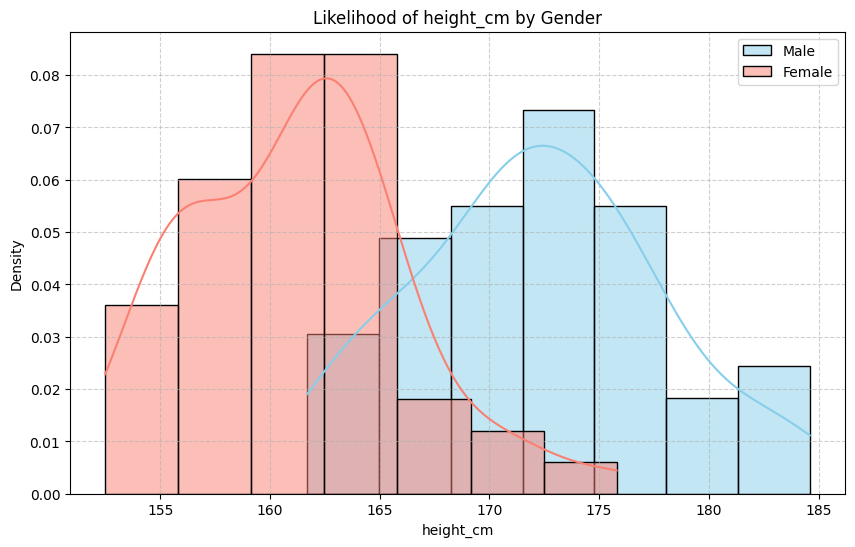

In [ ]:
# prompt: "키" 특성을 기준으로 남성과 여성일 경우 각각의 likelihood를 시각화해줘. 그림의 텍스트는영어로 해주라

import matplotlib.pyplot as plt
import seaborn as sns

# Separate data by gender
df_male = df[df['gender'] == 'male']
df_female = df[df['gender'] == 'female']

# Plot the likelihood of 'height_cm' for each gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_male, x='height_cm', kde=True, stat='density', color='skyblue', label='Male')
sns.histplot(data=df_female, x='height_cm', kde=True, stat='density', color='salmon', label='Female')
plt.title('Likelihood of height_cm by Gender')
plt.xlabel('height_cm')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# prompt: 168인 사람은 남자인가 여자인가? 산술식을 프린트해주고

import numpy as np
# Assume a height_cm of 168 cm
height_cm = 168

# Calculate the mean and standard deviation of height_cm for each gender from the generated data
# We will use these as estimates for the distributions
mean_height_cm_male = df_male['height_cm'].mean()
std_height_cm_male = df_male['height_cm'].std()
mean_height_cm_female = df_female['height_cm'].mean()
std_height_cm_female = df_female['height_cm'].std()

print(f"남성 평균 키: {mean_height_cm_male:.2f}, 남성 키 표준편차: {std_height_cm_male:.2f}")
print(f"여성 평균 키: {mean_height_cm_female:.2f}, 여성 키 표준편차: {std_height_cm_female:.2f}")


# Define a function to calculate the probability density function (PDF) for a normal distribution
def normal_pdf(x, mean, std):
    exponent = -((x - mean) ** 2) / (2 * (std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)

# Calculate the likelihood of observing a height_cm of 168 for each gender
# This is P(height_cm=168 | Gender)
likelihood_male = normal_pdf(height_cm, mean_height_cm_male, std_height_cm_male)
likelihood_female = normal_pdf(height_cm, mean_height_cm_female, std_height_cm_female)

print(f"P(키=168 | 남성): {likelihood_male:.4f}")
print(f"P(키=168 | 여성): {likelihood_female:.4f}")


# Calculate the posterior probability using Bayes' theorem
# P(Gender | height_cm=168) = [P(height_cm=168 | Gender) * P(Gender)] / P(height_cm=168)
# The denominator P(height_cm=168) is P(height_cm=168 | Male) * P(Male) + P(height_cm=168 | Female) * P(Female)

# Calculate the evidence (denominator)
evidence = (likelihood_male * prior_male) + (likelihood_female * prior_female)

# Calculate the posterior probabilities
posterior_male = (likelihood_male * prior_male) / evidence
posterior_female = (likelihood_female * prior_female) / evidence

print(f"\n베이즈 정리 적용 산술식:")
print(f"P(남성 | 키=168) = [P(키=168 | 남성) * P(남성)] / P(키=168)")
print(f"P(여성 | 키=168) = [P(키=168 | 여성) * P(여성)] / P(키=168)")
print(f"여기서 P(키=168) = P(키=168 | 남성) * P(남성) + P(키=168 | 여성) * P(여성)")

print(f"\n계산 결과:")
print(f"P(남성 | 키=168) = ({likelihood_male:.4f} * {prior_male:.4f}) / {evidence:.4f} = {posterior_male:.4f}")
print(f"P(여성 | 키=168) = ({likelihood_female:.4f} * {prior_female:.4f}) / {evidence:.4f} = {posterior_female:.4f}")


# Determine the most likely gender based on the posterior probabilities
if posterior_male > posterior_female:
    predicted_gender = "남성"
else:
    predicted_gender = "여성"

print(f"\n키가 168cm인 사람은 데이터 분포 및 베이즈 정리에 따르면 {predicted_gender}일 가능성이 높습니다.")

남성 평균 키: 172.15, 남성 키 표준편차: 5.60
여성 평균 키: 161.26, 여성 키 표준편차: 4.92
P(키=168 | 남성): 0.0541
P(키=168 | 여성): 0.0317

베이즈 정리 적용 산술식:
P(남성 | 키=168) = [P(키=168 | 남성) * P(남성)] / P(키=168)
P(여성 | 키=168) = [P(키=168 | 여성) * P(여성)] / P(키=168)
여기서 P(키=168) = P(키=168 | 남성) * P(남성) + P(키=168 | 여성) * P(여성)

계산 결과:
P(남성 | 키=168) = (0.0541 * 0.5000) / 0.0429 = 0.6305
P(여성 | 키=168) = (0.0317 * 0.5000) / 0.0429 = 0.3695

키가 168cm인 사람은 데이터 분포 및 베이즈 정리에 따르면 남성일 가능성이 높습니다.


In [ ]:
df.columns

Index(['gender', 'height_cm', 'weight_kg', 'foot_length_mm'], dtype='object')

<ipython-input-40-1e3b3034df22>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


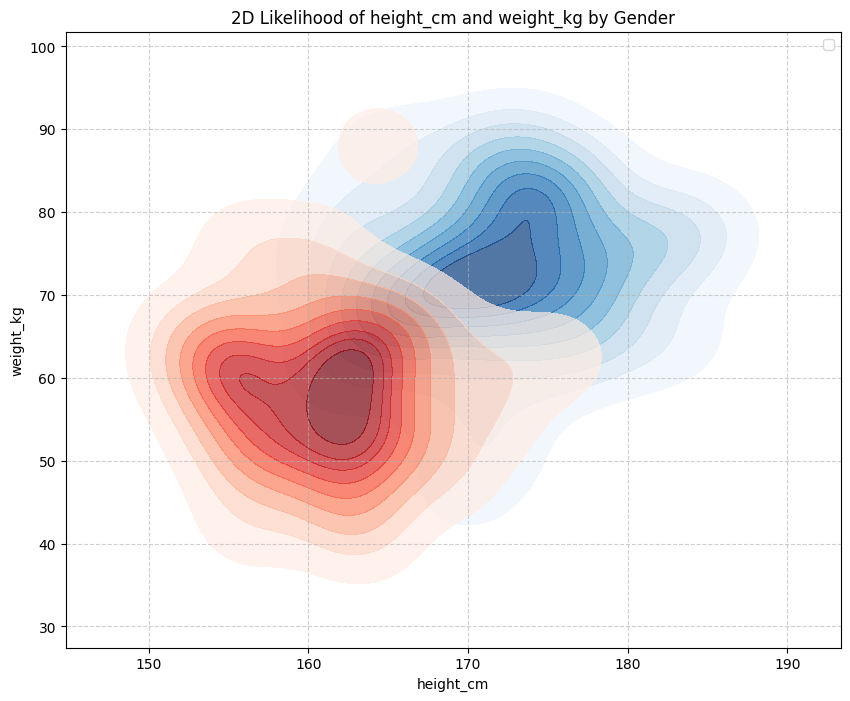

In [ ]:
# prompt: "키"와 "몸무게"를 특성을 기준으로 남성과 여성일 경우 각각의 likelihood를 2차원 시각화해줘. 그림의 텍스트는 영어로 해주라

import matplotlib.pyplot as plt

# Create a 2D visualization of likelihood based on 'height_cm' and 'weight_kg'
# Using Kernel Density Estimation for a smooth representation
plt.figure(figsize=(10, 8))

# Plot for Male
sns.kdeplot(data=df_male, x='height_cm', y='weight_kg', fill=True, cmap='Blues', alpha=0.7, label='Male Likelihood')
# Plot for Female
sns.kdeplot(data=df_female, x='height_cm', y='weight_kg', fill=True, cmap='Reds', alpha=0.7, label='Female Likelihood')

plt.title('2D Likelihood of height_cm and weight_kg by Gender')
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

남성 (키 평균: 172.15, 키 표준편차: 5.60)
남성 (몸무게 평균: 72.67, 몸무게 표준편차: 8.75)
여성 (키 평균: 161.26, 키 표준편차: 4.92)
여성 (몸무게 평균: 58.51, 몸무게 표준편차: 8.73)

P(키=168, 몸무게=78 | 남성) = P(키=168 | 남성) * P(몸무게=78 | 남성) = 0.0541 * 0.0379 = 0.00205114
P(키=168, 몸무게=78 | 여성) = P(키=168 | 여성) * P(몸무게=78 | 여성) = 0.0317 * 0.0038 = 0.00011990

베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):
P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)
P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)
여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)

계산 결과 (키=168, 몸무게=78):
P(남성 | 키=168, 몸무게=78) = (0.00205114 * 0.5000) / 0.00108552 = 0.9448
P(여성 | 키=168, 몸무게=78) = (0.00011990 * 0.5000) / 0.00108552 = 0.0552

키가 168cm이고 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 남성일 가능성이 높습니다.


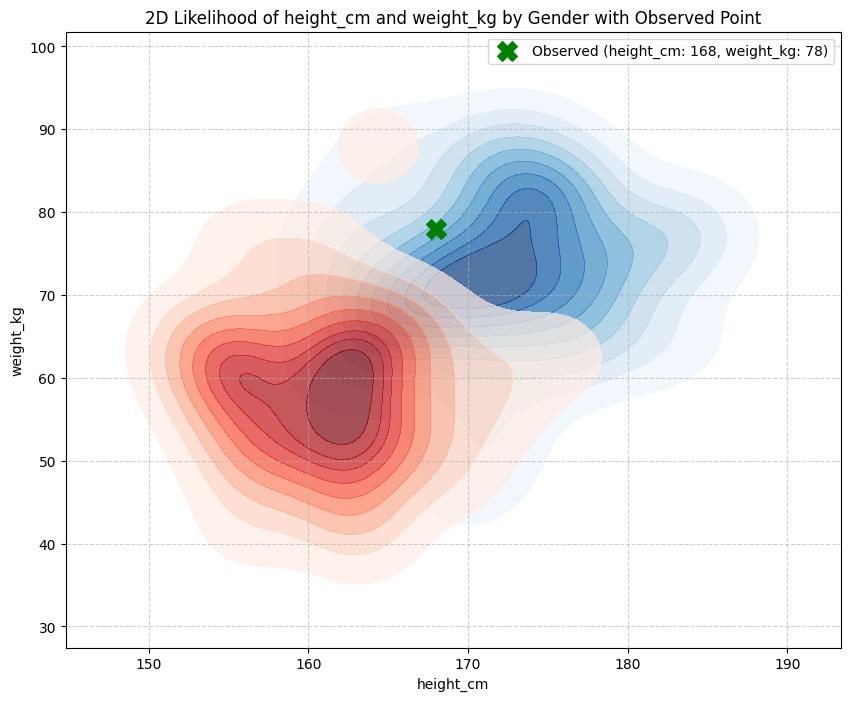

In [ ]:
# prompt: "키"가 168이고 몸무게가 "78" 인 경우는 남자인가 여자인가? 산술식으로 표시해 주라

import matplotlib.pyplot as plt
# Now, consider both height_cm and weight_kg for the prediction
height_cm_obs = 168
weight_kg_obs = 78

# Calculate the mean and standard deviation for both features and genders
mean_height_cm_male = df_male['height_cm'].mean()
std_height_cm_male = df_male['height_cm'].std()
mean_weight_kg_male = df_male['weight_kg'].mean()
std_weight_kg_male = df_male['weight_kg'].std()

mean_height_cm_female = df_female['height_cm'].mean()
std_height_cm_female = df_female['height_cm'].std()
mean_weight_kg_female = df_female['weight_kg'].mean()
std_weight_kg_female = df_female['weight_kg'].std()

print(f"남성 (키 평균: {mean_height_cm_male:.2f}, 키 표준편차: {std_height_cm_male:.2f})")
print(f"남성 (몸무게 평균: {mean_weight_kg_male:.2f}, 몸무게 표준편차: {std_weight_kg_male:.2f})")
print(f"여성 (키 평균: {mean_height_cm_female:.2f}, 키 표준편차: {std_height_cm_female:.2f})")
print(f"여성 (몸무게 평균: {mean_weight_kg_female:.2f}, 몸무게 표준편차: {std_weight_kg_female:.2f})")


# Calculate the likelihood of observing height_cm=168 and weight_kg=78 for each gender
# Assuming independence between height_cm and weight_kg for simplicity (Naive Bayes assumption)
# P(height_cm=168, weight_kg=78 | Gender) = P(height_cm=168 | Gender) * P(weight_kg=78 | Gender)

likelihood_male_height_cm = normal_pdf(height_cm_obs, mean_height_cm_male, std_height_cm_male)
likelihood_male_weight_kg = normal_pdf(weight_kg_obs, mean_weight_kg_male, std_weight_kg_male)
likelihood_male_combined = likelihood_male_height_cm * likelihood_male_weight_kg

likelihood_female_height_cm = normal_pdf(height_cm_obs, mean_height_cm_female, std_height_cm_female)
likelihood_female_weight_kg = normal_pdf(weight_kg_obs, mean_weight_kg_female, std_weight_kg_female)
likelihood_female_combined = likelihood_female_height_cm * likelihood_female_weight_kg

print(f"\nP(키=168, 몸무게=78 | 남성) = P(키=168 | 남성) * P(몸무게=78 | 남성) = {likelihood_male_height_cm:.4f} * {likelihood_male_weight_kg:.4f} = {likelihood_male_combined:.8f}")
print(f"P(키=168, 몸무게=78 | 여성) = P(키=168 | 여성) * P(몸무게=78 | 여성) = {likelihood_female_height_cm:.4f} * {likelihood_female_weight_kg:.4f} = {likelihood_female_combined:.8f}")


# Calculate the evidence for the combined features
evidence_combined = (likelihood_male_combined * prior_male) + (likelihood_female_combined * prior_female)

# Calculate the posterior probabilities using Bayes' theorem
# P(Gender | height_cm=168, weight_kg=78) = [P(height_cm=168, weight_kg=78 | Gender) * P(Gender)] / P(height_cm=168, weight_kg=78)
# Denominator P(height_cm=168, weight_kg=78) = P(height_cm=168, weight_kg=78 | Male) * P(Male) + P(height_cm=168, weight_kg=78 | Female) * P(Female)

if evidence_combined == 0: # Avoid division by zero
    posterior_male_combined = 0
    posterior_female_combined = 0
else:
    posterior_male_combined = (likelihood_male_combined * prior_male) / evidence_combined
    posterior_female_combined = (likelihood_female_combined * prior_female) / evidence_combined

print(f"\n베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):")
print(f"P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)")
print(f"P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)")
print(f"여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)")

print(f"\n계산 결과 (키=168, 몸무게=78):")
print(f"P(남성 | 키=168, 몸무게=78) = ({likelihood_male_combined:.8f} * {prior_male:.4f}) / {evidence_combined:.8f} = {posterior_male_combined:.4f}")
print(f"P(여성 | 키=168, 몸무게=78) = ({likelihood_female_combined:.8f} * {prior_female:.4f}) / {evidence_combined:.8f} = {posterior_female_combined:.4f}")


# Determine the most likely gender based on the combined posterior probabilities
if posterior_male_combined > posterior_female_combined:
    predicted_gender_combined = "남성"
elif posterior_female_combined > posterior_male_combined:
    predicted_gender_combined = "여성"
else:
    predicted_gender_combined = "알 수 없음 (확률 동일)"


print(f"\n키가 168cm이고 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 {predicted_gender_combined}일 가능성이 높습니다.")

# Plot the observed point on the 2D likelihood visualization
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_male, x='height_cm', y='weight_kg', fill=True, cmap='Blues', alpha=0.7, label='Male Likelihood')
sns.kdeplot(data=df_female, x='height_cm', y='weight_kg', fill=True, cmap='Reds', alpha=0.7, label='Female Likelihood')
plt.scatter(height_cm_obs, weight_kg_obs, color='green', marker='X', s=200, label=f'Observed (height_cm: {height_cm_obs}, weight_kg: {weight_kg_obs})', zorder=5)

plt.title('2D Likelihood of height_cm and weight_kg by Gender with Observed Point')
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


남성 평균 몸무게: 72.67, 남성 몸무게 표준편차: 8.75
여성 평균 몸무게: 58.51, 여성 몸무게 표준편차: 8.73
P(몸무게=78 | 남성): 0.0395
P(몸무게=78 | 여성): 0.0253

P(키=168, 몸무게=78 | 남성) (독립 가정): 0.0021
P(키=168, 몸무게=78 | 여성) (독립 가정): 0.0008
P(키=168, 몸무게=78): 0.0015

베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):
P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)
P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)
여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)

계산 결과 (키=168, 몸무게=78):
P(남성 | 키=168, 몸무게=78) = (0.0021 * 0.5000) / 0.0015 = 0.7272
P(여성 | 키=168, 몸무게=78) = (0.0008 * 0.5000) / 0.0015 = 0.2728

키가 168cm, 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 남성일 가능성이 높습니다.


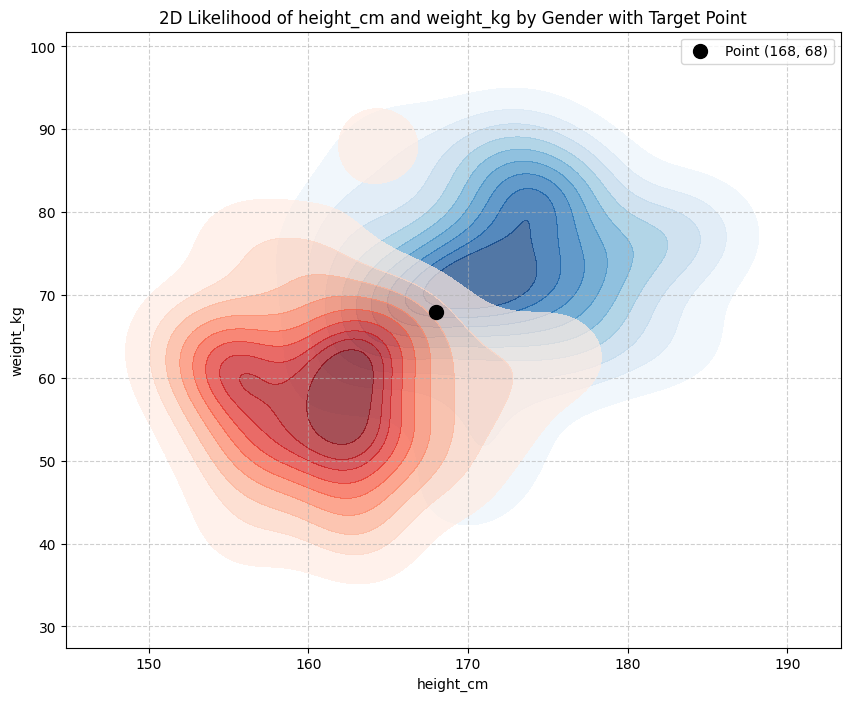

In [ ]:
# prompt: "키"가 168이고 몸무게가 "78" 인 경우는 남자인가 여자인가? 산술식으로 표시해 주라

import matplotlib.pyplot as plt
# Given values
height_cm = 168
weight_kg = 68

# Calculate the mean and standard deviation of weight_kg for each gender from the generated data
mean_weight_kg_male = df_male['weight_kg'].mean()
std_weight_kg_male = df_male['weight_kg'].std()
mean_weight_kg_female = df_female['weight_kg'].mean()
std_weight_kg_female = df_female['weight_kg'].std()

print(f"\n남성 평균 몸무게: {mean_weight_kg_male:.2f}, 남성 몸무게 표준편차: {std_weight_kg_male:.2f}")
print(f"여성 평균 몸무게: {mean_weight_kg_female:.2f}, 여성 몸무게 표준편차: {std_weight_kg_female:.2f}")

# Calculate the likelihood of observing a weight_kg of 78 for each gender
# This is P(weight_kg=78 | Gender)
likelihood_weight_kg_male = normal_pdf(weight_kg, mean_weight_kg_male, std_weight_kg_male)
likelihood_weight_kg_female = normal_pdf(weight_kg, mean_weight_kg_female, std_weight_kg_female)

print(f"P(몸무게=78 | 남성): {likelihood_weight_kg_male:.4f}")
print(f"P(몸무게=78 | 여성): {likelihood_weight_kg_female:.4f}")

# Assuming independence between height_cm and weight_kg given the gender (Naive Bayes assumption)
# P(height_cm=168, weight_kg=78 | Gender) = P(height_cm=168 | Gender) * P(weight_kg=78 | Gender)

likelihood_combined_male = likelihood_male * likelihood_weight_kg_male
likelihood_combined_female = likelihood_female * likelihood_weight_kg_female

print(f"\nP(키=168, 몸무게=78 | 남성) (독립 가정): {likelihood_combined_male:.4f}")
print(f"P(키=168, 몸무게=78 | 여성) (독립 가정): {likelihood_combined_female:.4f}")

# Calculate the evidence (denominator) for the combined likelihood
# P(height_cm=168, weight_kg=78) = P(height_cm=168, weight_kg=78 | Male) * P(Male) + P(height_cm=168, weight_kg=78 | Female) * P(Female)
evidence_combined = (likelihood_combined_male * prior_male) + (likelihood_combined_female * prior_female)

print(f"P(키=168, 몸무게=78): {evidence_combined:.4f}")


# Calculate the posterior probabilities using Bayes' theorem with combined likelihood
# P(Gender | height_cm=168, weight_kg=78) = [P(height_cm=168, weight_kg=78 | Gender) * P(Gender)] / P(height_cm=168, weight_kg=78)

posterior_combined_male = (likelihood_combined_male * prior_male) / evidence_combined
posterior_combined_female = (likelihood_combined_female * prior_female) / evidence_combined

print(f"\n베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):")
print(f"P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)")
print(f"P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)")
print(f"여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)")

print(f"\n계산 결과 (키=168, 몸무게=78):")
print(f"P(남성 | 키=168, 몸무게=78) = ({likelihood_combined_male:.4f} * {prior_male:.4f}) / {evidence_combined:.4f} = {posterior_combined_male:.4f}")
print(f"P(여성 | 키=168, 몸무게=78) = ({likelihood_combined_female:.4f} * {prior_female:.4f}) / {evidence_combined:.4f} = {posterior_combined_female:.4f}")

# Determine the most likely gender based on the combined posterior probabilities
if posterior_combined_male > posterior_combined_female:
    predicted_gender_combined = "남성"
else:
    predicted_gender_combined = "여성"

print(f"\n키가 168cm, 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 {predicted_gender_combined}일 가능성이 높습니다.")

# Add the point (168, 78) to the 2D plot
plt.figure(figsize=(10, 8))

sns.kdeplot(data=df_male, x='height_cm', y='weight_kg', fill=True, cmap='Blues', alpha=0.7, label='Male Likelihood')
sns.kdeplot(data=df_female, x='height_cm', y='weight_kg', fill=True, cmap='Reds', alpha=0.7, label='Female Likelihood')

plt.scatter(height_cm, weight_kg, color='black', s=100, zorder=5, label=f'Point ({height_cm}, {weight_kg})')

plt.title('2D Likelihood of height_cm and weight_kg by Gender with Target Point')
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


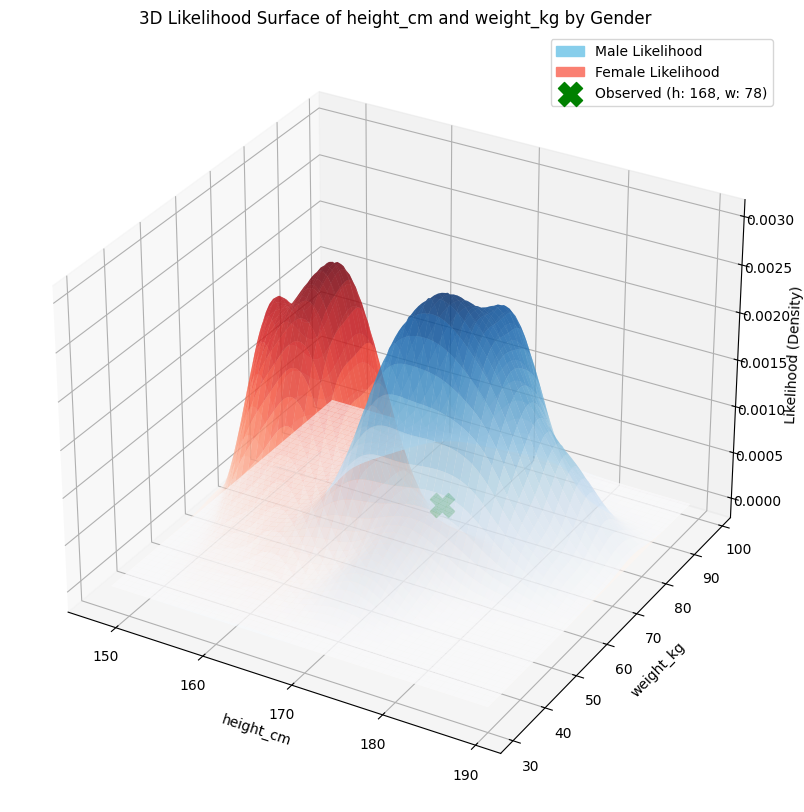

In [ ]:
# prompt: 키"가 168이고 몸무게가 "78" 인 경우는 남자인가 여자인가?  kernel 함수를 사용하여 3차원 시각화로

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches # Import mpatches

# Given values
height_cm_obs = 168
weight_kg_obs = 78

# Calculate likelihood surface using Kernel Density Estimation for 3D visualization
# We'll approximate this by creating a grid of points and calculating the KDE value at each point

# Create a grid for visualization
h_min, h_max = df['height_cm'].min() - 5, df['height_cm'].max() + 5
w_min, w_max = df['weight_kg'].min() - 10, df['weight_kg'].max() + 10
h_grid, w_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(w_min, w_max, 100))

# Combine the grid points for KDE evaluation
grid_points = np.vstack([h_grid.ravel(), w_grid.ravel()])

# Evaluate KDE for male and female data on the grid
from scipy.stats import gaussian_kde

kde_male = gaussian_kde(df_male[['height_cm', 'weight_kg']].T)
kde_female = gaussian_kde(df_female[['height_cm', 'weight_kg']].T)

z_male = kde_male(grid_points).reshape(h_grid.shape)
z_female = kde_female(grid_points).reshape(h_grid.shape)

# Create the 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the likelihood surfaces
male_surface = ax.plot_surface(h_grid, w_grid, z_male, cmap='Blues', alpha=0.6) # No label here
female_surface = ax.plot_surface(h_grid, w_grid, z_female, cmap='Reds', alpha=0.6) # No label here


# Plot the observed point
observed_scatter = ax.scatter(height_cm_obs, weight_kg_obs, 0, color='green', marker='X', s=300, label=f'Observed (h: {height_cm_obs}, w: {weight_kg_obs})', zorder=5)


# Calculate the likelihood at the observed point
likelihood_at_obs_male = kde_male(np.array([[height_cm_obs], [weight_kg_obs]]))[0]
likelihood_at_obs_female = kde_female(np.array([[height_cm_obs], [weight_kg_obs]]))[0]


ax.set_xlabel('height_cm')
ax.set_ylabel('weight_kg')
ax.set_zlabel('Likelihood (Density)')
ax.set_title('3D Likelihood Surface of height_cm and weight_kg by Gender')

# Create proxy artists for the legend for the surfaces
male_patch = mpatches.Patch(color='skyblue', label='Male Likelihood')
female_patch = mpatches.Patch(color='salmon', label='Female Likelihood')

# Collect all legend handles
handles = [male_patch, female_patch, observed_scatter]

ax.legend(handles=handles)


plt.show()

# prompt: 나이브베이지안에 대해 마크다운 형테로 산술식과 같이 설명해다오

## **[나이브 베이즈 분류 (Naive Bayes Classifier)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)**

나이브 베이즈는 지도 학습 분류 알고리즘 중 하나로, **베이즈 정리(Bayes' Theorem)**에 기반하며 **모든 특성(feature)들이 서로 조건부 독립**이라고 가정하는 간단하면서도 강력한 방법입니다. 특히 텍스트 분류나 스팸 메일 필터링 등에 많이 사용됩니다.

### 1. 베이즈 정리 (Bayes' Theorem)

나이브 베이즈 분류의 핵심은 베이즈 정리입니다. 베이즈 정리는 어떤 사건이 발생했을 때, 그 사건과 관련된 다른 사건들의 확률을 갱신하는 방법을 제공합니다. 수학적으로는 다음과 같이 표현됩니다.

$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

각 항의 의미는 다음과 같습니다.

*   $P(A|B)$: 사후 확률 (Posterior Probability). B라는 증거가 주어졌을 때 A가 일어날 확률. 우리가 알고 싶은 확률입니다.
*   $P(B|A)$: 가능도 (Likelihood). A라는 가설이 참일 때 B라는 증거가 관찰될 확률.
*   $P(A)$: 사전 확률 (Prior Probability). B라는 증거가 관찰되기 전에 A가 일어날 확률.
*   $P(B)$: 증거 확률 (Evidence). B라는 증거가 일어날 전체 확률.

### 2. 나이브 베이즈 분류의 기본 원리

나이브 베이즈 분류는 주어진 입력 데이터(특성들의 집합)가 특정 클래스에 속할 확률을 계산하여 가장 높은 확률을 가진 클래스로 분류합니다.

데이터셋이 $n$개의 특성 $x_1, x_2, ..., x_n$으로 구성되어 있고, 분류하려는 클래스가 $C_k$라고 할 때, 나이브 베이즈 분류는 베이즈 정리를 이용하여 다음과 같이 표현할 수 있습니다.

$$P(C_k | x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n | C_k) * P(C_k)}{P(x_1, x_2, ..., x_n)}$$

*   $P(C_k | x_1, x_2, ..., x_n)$: 특성 $x_1, ..., x_n$이 주어졌을 때 데이터가 클래스 $C_k$에 속할 사후 확률.
*   $P(x_1, x_2, ..., x_n | C_k)$: 클래스 $C_k$일 때 특성 $x_1, ..., x_n$이 관찰될 가능도.
*   $P(C_k)$: 클래스 $C_k$의 사전 확률.
*   $P(x_1, x_2, ..., x_n)$: 특성 $x_1, ..., x_n$이 관찰될 전체 확률 (증거).

### 3. 나이브(Naive) 가정

나이브 베이즈 분류에서 '나이브(Naive)'라는 이름이 붙은 이유는 **모든 특성들이 클래스가 주어졌을 때 서로 조건부 독립**이라고 가정하기 때문입니다. 이 가정을 통해 가능도 $P(x_1, x_2, ..., x_n | C_k)$를 다음과 같이 간단하게 계산할 수 있습니다.

$$P(x_1, x_2, ..., x_n | C_k) = P(x_1 | C_k) * P(x_2 | C_k) * ... * P(x_n | C_k)$$

이 가정이 실제로는 엄격하게 만족되기 어렵지만, 놀랍게도 많은 경우에 잘 작동하며 계산이 매우 효율적입니다.

나이브 가정을 적용하여 베이즈 정리를 다시 쓰면 다음과 같습니다.

$$P(C_k | x_1, x_2, ..., x_n) = \frac{P(x_1 | C_k) * P(x_2 | C_k) * ... * P(x_n | C_k) * P(C_k)}{P(x_1, x_2, ..., x_n)}$$

분류를 수행할 때는 각 클래스 $C_k$에 대해 사후 확률 $P(C_k | x_1, x_2, ..., x_n)$를 계산하고, 가장 높은 확률을 가진 클래스로 예측합니다. 이 때 분모의 $P(x_1, x_2, ..., x_n)$는 클래스 $C_k$와 무관하게 모든 클래스에 대해 동일하므로, 분류 시에는 분자만 비교해도 충분합니다.

따라서 분류 결정은 다음과 같이 이루어집니다.

$$\hat{C} = \underset{k}{\operatorname{argmax}} P(C_k) \prod_{i=1}^{n} P(x_i | C_k)$$

$\hat{C}$는 예측된 클래스입니다.

### 4. 확률 추정 방법

나이브 베이즈 모델을 구축하기 위해서는 훈련 데이터로부터 다음 두 가지 확률을 추정해야 합니다.

1.  **클래스의 사전 확률 ($P(C_k)$):** 각 클래스 $C_k$가 훈련 데이터에 나타나는 빈도로 추정합니다.
    $$P(C_k) = \frac{\text{클래스 } C_k \text{에 속하는 데이터 수}}{\text{전체 데이터 수}}$$

2.  **특성의 조건부 확률 ($P(x_i | C_k)$):** 클래스 $C_k$에 속하는 데이터 중에서 특정 특성 $x_i$가 나타나는 빈도로 추정합니다. 특성의 종류에 따라 확률 추정 방법이 다릅니다.

    *   **이산형/범주형 특성:** 해당 특성 값이 클래스 $C_k$에서 얼마나 자주 나타나는지를 빈도로 계산합니다. 라플라스 스무딩(Laplace smoothing) 등을 사용하여 확률이 0이 되는 경우를 방지하기도 합니다.
        $$P(x_i | C_k) = \frac{\text{클래스 } C_k \text{ 중 } x_i \text{ 값을 갖는 데이터 수}}{\text{클래스 } C_k \text{에 속하는 데이터 수}}$$

    *   **연속형 특성:** 특성 값이 특정 확률 분포(예: 정규 분포)를 따른다고 가정하고, 해당 분포의 평균과 표준편차를 클래스 $C_k$의 데이터로부터 추정합니다. 그런 다음, 주어진 $x_i$ 값에 대해 해당 분포의 확률 밀도 함수(PDF) 값을 계산합니다. 가우시안 나이브 베이즈(Gaussian Naive Bayes)가 이에 해당합니다.

        예를 들어, 특성 $x_i$가 클래스 $C_k$에서 평균 $\mu_{k,i}$와 표준편차 $\sigma_{k,i}$인 정규 분포를 따른다고 가정하면, $P(x_i | C_k)$는 다음과 같이 계산됩니다.

        $$P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{k,i}^2}} \exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)$$

        여기서 $\mu_{k,i}$와 $\sigma_{k,i}$는 훈련 데이터에서 클래스 $C_k$에 속하는 데이터의 $x_i$ 값들의 평균과 표준편차로 추정됩니다.

### 5. 장점과 단점

**장점:**

*   계산이 빠르고 효율적입니다. 대규모 데이터셋에도 잘 작동합니다.
*   구현이 간단합니다.
*   소량의 훈련 데이터로도 모델을 구축할 수 있습니다.
*   잡음(noise)이나 결측치(missing values)에 비교적 강건합니다.

**단점:**

*   특성 간의 독립성 가정은 실제 데이터에서 거의 만족되지 않으며, 이로 인해 성능이 제한될 수 있습니다.
*   확률 추정 시 발생할 수 있는 확률 0 문제 (Zero Probability Problem)를 해결하기 위한 스무딩 기법이 필요할 수 있습니다.

### 6. 예시 (위 코드와 연결)

위 코드에서는 성별(Gender)을 클래스로, 키(height_cm)와 몸무게(weight_kg)를 특성으로 사용하여 나이브 베이즈 분류의 원리를 시뮬레이션하고 있습니다. 연속형 특성인 키와 몸무게에 대해 가우시안 나이브 베이즈를 적용하여 확률을 계산합니다.

1.  **사전 확률 계산:** 데이터셋 전체에서 남성과 여성의 비율을 계산하여 $P(\text{남성})$과 $P(\text{여성})$을 추정합니다.
    $$P(\text{Gender}) = \frac{\text{해당 Gender 수}}{\text{전체 데이터 수}}$$

2.  **가능도 계산 (키만 고려):** 주어진 키 값($x_1$)이 남성일 때 관찰될 확률 $P(\text{키}=x_1 | \text{남성})$과 여성일 때 관찰될 확률 $P(\text{키}=x_1 | \text{여성})$을 계산합니다. 이는 남성 데이터의 키 분포와 여성 데이터의 키 분포(코드에서는 정규분포를 가정하고 평균, 표준편차 사용)에서 해당 키 값의 확률 밀도 함수(PDF) 값을 찾는 방식으로 이루어집니다.
    $$P(\text{키} | \text{Gender}) = \text{Normal_PDF}(\text{키}, \mu_{\text{Gender}, \text{키}}, \sigma_{\text{Gender}, \text{키}})$$

3.  **사후 확률 계산 (키만 고려):** 베이즈 정리를 이용하여 주어진 키 값을 가진 사람이 남성일 사후 확률 $P(\text{남성} | \text{키}=x_1)$과 여성일 사후 확률 $P(\text{여성} | \text{키}=x_1)$을 계산합니다.
    $$P(\text{남성} | \text{키}=x_1) = \frac{P(\text{키}=x_1 | \text{남성}) * P(\text{남성})}{P(\text{키}=x_1)}$$
    $$P(\text{여성} | \text{키}=x_1) = \frac{P(\text{키}=x_1 | \text{여성}) * P(\text{여성})}{P(\text{키}=x_1)}$$
    여기서 분모 $P(\text{키}=x_1) = P(\text{키}=x_1 | \text{남성}) * P(\text{남성}) + P(\text{키}=x_1 | \text{여성}) * P(\text{여성})$ 입니다.

4.  **가능도 계산 (키와 몸무게 모두 고려):** 나이브 가정 하에, 키와 몸무게 특성이 독립이라고 간주하고 결합 가능도를 계산합니다.
    $$P(\text{키}, \text{몸무게} | \text{Gender}) = P(\text{키} | \text{Gender}) * P(\text{몸무게} | \text{Gender})$$
    여기서 $P(\text{몸무게} | \text{Gender})$는 키와 마찬가지로 해당 성별의 몸무게 분포(정규분포 가정)의 PDF 값으로 계산됩니다.

5.  **사후 확률 계산 (키와 몸무게 모두 고려):** 결합 가능도를 사용하여 베이즈 정리를 다시 적용하여 주어진 키와 몸무게를 가진 사람이 남성일 사후 확률과 여성일 사후 확률을 계산합니다.
    $$P(\text{남성} | \text{키}, \text{몸무게}) = \frac{P(\text{키}, \text{몸무게} | \text{남성}) * P(\text{남성})}{P(\text{키}, \text{몸무게})}$$
    $$P(\text{여성} | \text{키}, \text{몸무게}) = \frac{P(\text{키}, \text{몸무게} | \text{여성}) * P(\text{여성})}{P(\text{키}, \text{몸무게})}$$
    여기서 분모 $P(\text{키}, \text{몸무게}) = P(\text{키}, \text{몸무게} | \text{남성}) * P(\text{남성}) + P(\text{키}, \text{몸무게} | \text{여성}) * P(\text{여성})$ 입니다.

6.  **분류:** 계산된 사후 확률 값들 중 가장 높은 값을 갖는 클래스(성별)로 최종 분류합니다.

이 과정을 통해 나이브 베이즈 분류기가 어떻게 작동하는지 이해할 수 있습니다. 실제 구현에서는 Scikit-learn과 같은 라이브러리의 `GaussianNB`, `MultinomialNB`, `BernoulliNB` 등의 클래스를 사용합니다.

# **[discriminative vs generative model](https://ratsgo.github.io/generative%20model/2017/12/17/compare/)**

<img src='https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F1b23e2b9-5705-4fe5-9c9e-61d9abcd4b98_3078x3882.jpeg'>

<img src='https://i.imgur.com/4leE3wr.jpg'>

# **LLM**

<img src='https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg'>

### **언어, 이미지 등은 순서가 있는 데이터의 배열이다.**

<img src ='https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/causal_modeling.svg'>